## Soal 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
init_printing(use_latex=True)


contoh 18.2
persamaan interpolasi
0.462098⋅x - 0.0518731⋅(x - 4.0)⋅(x - 1.0) - 0.462098
contoh 18.3
persamaan interpolasi
0.462098⋅x + 0.00786540000000001⋅(x - 6.0)⋅(x - 4.0)⋅(x - 1.0) - 0.0518731⋅(x 
- 4.0)⋅(x - 1.0) - 0.462098


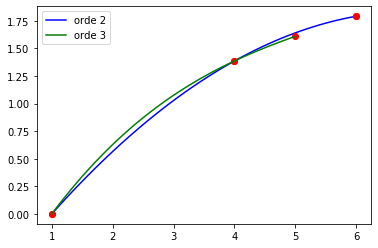

In [2]:
# intepolasi newton

import numpy as np
import matplotlib.pyplot as plt 
from sympy import *


def interpolasi_newton(x,y,xn):# fungsi untuk interpolasi newton
    assert (x.shape == y.shape)
    n = np.size(x)
    # define matriks
    f = np.zeros((n,n),dtype=float)
    b = np.zeros(n,dtype=float)
    f[:,0] = y
    for kl in range(1,n): # looping untuk menghitung b
        for br in range(kl,n):
            f[br,kl]=(f[br,kl-1]-f[br-1,kl-1])/(x[br]-x[br-kl])#F[baris,kolom]
    for i in range(n):
        b[i]=f[i,i]
    #print("nilai b :",b)
    fxx=1
    fn=b[0]
    for i in range(1,n): # looping untuk mencari nilai fx interpolasi
        fxx = fxx*(xn-x[i-1])
        fn = fn + b[i]*fxx
    return fn

# implementasi fungsi
# contoh 18.2  
print('contoh 18.2')
# define matriks x dan y yang akan diinterpolasi
x= np.array([1,4,6],dtype=float)
y=np.array([0,1.386294,1.791759],dtype=float)
# menampilkan persamaan interpolasi
print("persamaan interpolasi")
xx=symbols("x")
fx =interpolasi_newton(x,y,xx)
pprint(fx)
#plotting hasil interpolasi
xp = np.linspace(x[0],x[len(x)-1],50)
yp = interpolasi_newton(x,y,xp)
plt.plot(x,y,'or') #plotting nilai awal
plt.plot(xp,yp,'b-',label="orde 2") #plotting hasil interpolasi

#contoh 18.3 
# define matriks x dan y yang akan diinterpolasi
print('contoh 18.3')
x= np.array([1,4,6,5],dtype=float)
y=np.array([0,1.386294,1.791759,1.609438],dtype=float)
# menampilkan persamaan interpolasi
print("persamaan interpolasi")
xx=symbols("x")
fx =interpolasi_newton(x,y,xx)
pprint(fx)
#plotting hasil interpolasi
xp = np.linspace(x[0],x[len(x)-1],50)
yp = interpolasi_newton(x,y,xp)
plt.plot(x,y,'or')  #plotting nilai awal
plt.plot(xp,yp,'g-',label="orde 3")#plotting hasil interpolasi
plt.legend()
plt.show()




    



## Soal 2

In [3]:
import numpy as np

def f(x): # fungsi ln(x)
    return np.log(x)
x = np.array(([1,4,6,5,3,1.5,2.5,3.5]),dtype=float)
y = f(x)
xx= 2
f_true = f(xx)

# memvariasikan data
#variasi 1 -> 4 data pertama 
x1=np.array(([1,4,6,5]),dtype=float)
y1 = f(x1)
#memasukkan ke dalam fungsi interpolasi
f_value = interpolasi_newton(x1,y1,xx)
error = f_value-f_true
print("variasi 1")
print("f(",xx,") = ",f_value )
print("error = ", error)
# variasi 2 -> 4 data terakhir
x2= np.array(([3,1.5,2.5,3.5]),dtype=float)
y2= f(x2)
#memasukkan ke dalam fungsi interpolasi
f_value = interpolasi_newton(x2,y2,xx)
error = f_value-f_true
print("variasi 2")
print("f(",xx,") = ",f_value )
print("error = ", error)
# variasi 3 -> 4 data tengah
x3 = np.array(([6,5,3,1.5]),dtype=float)
y3 = f(x3)
#memasukkan ke dalam fungsi interpolasi
f_value = interpolasi_newton(x3,y3,xx)
error = f_value-f_true
print("variasi 3")
print("f(",xx,") = ",f_value )
print("error = ", error)



variasi 1
f( 2 ) =  0.6287685789084135
error =  -0.06437860165153175
variasi 2
f( 2 ) =  0.6903808282940058
error =  -0.0027663522659394646
variasi 3
f( 2 ) =  0.67760370546515
error =  -0.015543475094795256


## Soal 3

contoh 18.2
persamaan interpolasi lagrange
f(x)=
1.386294⋅(3.0 - 0.5⋅x)⋅(0.333333333333333⋅x - 0.333333333333333) + 1.791759⋅(0
.2⋅x - 0.2)⋅(0.5⋅x - 2.0)
contoh 18.3
persamaan interpolasi lagrange
f(x)=
1.386294⋅(3.0 - 0.5⋅x)⋅(5.0 - 1.0⋅x)⋅(0.333333333333333⋅x - 0.333333333333333)
 + 1.609438⋅(6.0 - 1.0⋅x)⋅(0.25⋅x - 0.25)⋅(1.0⋅x - 4.0) + 1.791759⋅(0.2⋅x - 0.
2)⋅(0.5⋅x - 2.0)⋅(1.0⋅x - 5.0)


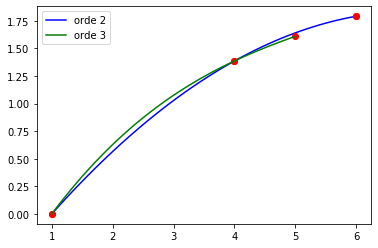

In [4]:
# Interpolasi lagrange

import numpy as np
import matplotlib.pyplot as plt
from sympy import *


def Lagrange(x,y,xn): # fungsi lagrange
    assert (x.shape == y.shape) #elemen matriks x harus sama dengan elemen matriks y
    n = np.size(x)
    L = np.array((1,n),dtype=float)
    fL = 0
    # looping perhitungan nilai interpolasi
    for i in range(n):
        La =1
        for j in range(n):
            if j==i:
                continue
            La=La*((xn-x[j])/(x[i]-x[j]))
        fL = fL + La*y[i]

    return fL

# implementasi fungsi
# contoh 18.2
print("contoh 18.2")
# define matriks x dan y yang akan diinterpolasi
x= np.array([1,4,6],dtype=float)
y=np.array([0,1.386294,1.791759],dtype=float)
n= np.size(x)
# untuk menampilkan persamaan interpolasi
print("persamaan interpolasi lagrange")
xx=symbols("x")
print("f(x)=")
pprint(Lagrange(x,y,xx))

#plotting hasil interpolasi
xp = np.linspace(x[0],x[n-1],50)
yp = Lagrange(x,y,xp) # pemanggilan fungsi lagrange
plt.plot(x,y,'or') #plotting nilai awal
plt.plot(xp,yp,'b-',label="orde 2") #plotting hasil interpolasi

#contoh 18.3
print("contoh 18.3")
# define matriks x dan y yang akan diinterpolasi
x= np.array([1,4,6,5],dtype=float)
y=np.array([0,1.386294,1.791759,1.609438],dtype=float)
n = np.size(x)
# untuk menampilkan persamaan interpolasi
print("persamaan interpolasi lagrange")
xx=symbols("x")
print("f(x)=")
pprint(Lagrange(x,y,xx))
#plotting hasil interpolasi
xp = np.linspace(x[0],x[n-1],50)
yp = Lagrange(x,y,xp)
plt.plot(x,y,'or')  #plotting nilai awal
plt.plot(xp,yp,'g-',label="orde 3")#plotting hasil interpolasi
plt.legend()
plt.show()

## Soal 4

Lagrange orde ke- 1
v( 10 ) =  4347.5


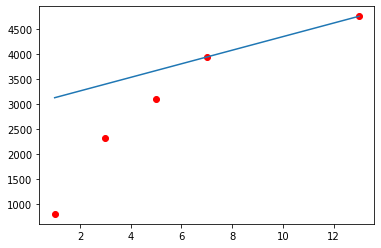

Lagrange orde ke- 2
v( 10 ) =  4672.8125


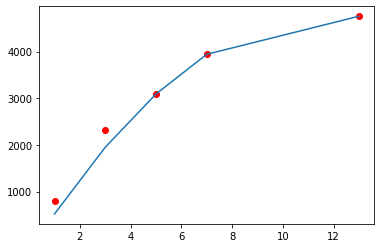

Lagrange orde ke- 3
v( 10 ) =  4874.84375


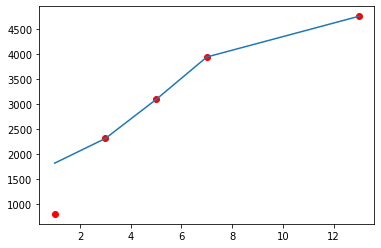

Lagrange orde ke- 4
v( 10 ) =  5430.1953125


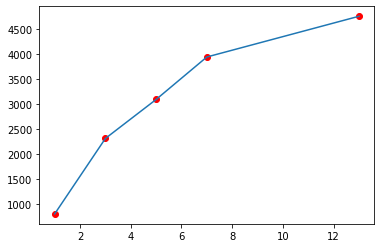

In [5]:
t = np.array(([1,3,5,7,13]),dtype=float) #sekon
v = np.array(([800,2310,3090,3940,4755]),dtype=float)# cm/s
#perhitungan orde 1,2,3,4
# nilai yang ingin diestimasi
tt = 10 #sekon
for i in range(1,5):
    n=np.size(t)
    ti = np.empty(i+1,dtype=float)
    vi = np.empty(i+1,dtype=float)
    for j in range(i+1): # looping untuk mendapatkan data yang digunakan untuk interpolasi
        ti[j] = t[n-i-1+j]
        vi[j] = v[n-i-1+j]
    #interpolasi lagrange soal 3
    v1=Lagrange(ti,vi,t)
    f_value=Lagrange(ti,vi,tt)
    print("Lagrange orde ke-", i)
    print("v(",tt,") = ", f_value)
    #plotting tiap orde
    plt.plot(t,v,"or")
    plt.plot(t,v1)
    plt.show()
    

## Soal 5

persamaan interval ke- 1
                                                                3             
-1.26439981743496⋅x + 3.17279780921953⋅(0.333333333333333⋅x - 1)  + 6.29319945

      
230488
persamaan interval ke- 2
                                                                3             
0.850798722044728⋅x + 24.1837699680511⋅(1 - 0.142857142857143⋅x)  + 2.76827019

                                3                   
625742⋅(0.222222222222222⋅x - 1)  - 3.93026015518028


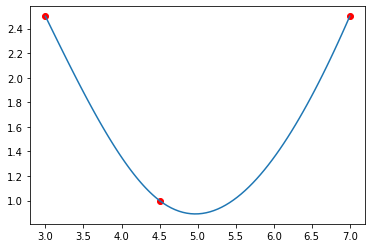

f(xi)= 1.34756732085806


In [6]:
#Spline Kubik
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing(use_latex=True)


def spline_kubik(x,y): # fungsi spline kubik untuk menampilkan persamaan
    assert(x.shape==y.shape) # banyak elemen x harus sama dengan elemen y
    n= np.size(x)
    # mendefinisikan matriks yang akan digunakan
    A = np.zeros((n-1,n-1),dtype=float)
    B = np.zeros(n-1,dtype=float)
    ddf = np.zeros(n,dtype=float)
    fp=np.zeros((1),dtype=float) # array untuk menyimpan persamaan interpolasi
    # menghitung matriks untuk mencari turunan kedua
    xa=np.append(x,[0])
    ya=np.append(y,[0])
    for i in range (n-1):
        print
        # matriks untuk sebelah kanan persamaan turunan kedua
        B[i]=6/(xa[i+2]-xa[i+1])*(ya[i+2]-ya[i+1])+6/(xa[i+1]-xa[i])*(ya[i]-ya[i+1])  
        # matriks untuk sebelah kiri persamaan turunan kedua
        for j in range (n-1):
            if j== i:
                A[i,j]=2*(xa[i+2]-xa[i])
            elif j < i:
                A[i,j]=(xa[i+1]-xa[i])
            elif j>i:
                A[i,j]=(xa[i+2]-xa[i+1]) 
     # Menghitung turunan kedua masing-masing titik
    ddf = np.linalg.solve(A,B)
    ddf = np.append([0],ddf)
        #print("persamaan matriks : A ddf = B")
        #print("A \n", A)
        #print("B \n", B)
        #print("sehingga matriks turunan kedua (ddf): \n", ddf)
    # menghitung persamaan interval dan disimpan dalam matriks fp
    for i in range(n-1):
        xx=symbols("x")
        fx=ddf[i]/(6*(x[i+1]-x[i]))*(x[i+1]-xx)**3+ddf[i+1]/(6*(x[i+1]-x[i]))*(xx-x[i])**3+(y[i]/(x[i+1]-x[i])-ddf[i]*(x[i+1]-x[i])/6)*(x[i+1]-xx)+(y[i+1]/(x[i+1]-x[i])-ddf[i+1]*(x[i+1]-x[i])/6)*(xx-x[i])
        fp=np.append(fp,fx)
    fp = np.delete(fp,0)
    #menampilkan persamaan interval
    for i in range(len(fp)):
        print("persamaan interval ke-", i+1)
        pprint(fp[i])
    xp=np.zeros([0],dtype=float)
    yp=np.zeros([0],dtype=float)
    #plotting hasil interpolasi
    for i in range (len(fp)):
        xin = np.linspace(x[i],x[i+1],50)
        for j in range (len(xin)):
            yin=N(fp[i].subs({xx:xin[j]}))
            yp=np.append(yp,yin)
        xp = np.append(xp,xin)
    plt.plot(x,y,'or')
    plt.plot(xp,yp)
    plt.show()
    return(fp) 

def fspline_kubik(xr): #untuk menghitung nilai fungsi pada titik tertentu
    assert(xr>=x[0] and xr<=x[len(x)-1])
    xx=symbols("x")
    fp = spline_kubik(x,y)
    for i in range(len(x)-1):
        if xi <= x[i+1] and xi > x[i]:
            nilai_f = N(fp[i].subs({xx:xi}))
        elif xi == x[0]:
            nilai_f = N(fp[0].subs({xx:xi}))
    return (nilai_f)

# Implementasi fungsi spline kubik
x = np.array(([3,4.5,7]), dtype=float)
y = np.array(([2.5,1,2.5]), dtype=float)
xi =6
f=fspline_kubik(xi)
print("f(xi)=",f)




pada contoh 18.10 terdapat tidak kesesuaian antara persamaan 18.37 dengan hasil persamaan 2.5f''(4.5)+9f''(7)=-9.6
jika berdasarkan persamaan 18.37 seharusnya bukan -9.6 namun -1.4571428571428569

## Soal 6

In [7]:
# regresi linear1
def regresi_linear1 (x,y,xx):
    assert (np.size(x)==np.size(y))
    sumx=0
    sumy=0
    sumxy=0
    sumx2=0
    for i in range (len(x)): #Looping untuk menghitung penjumlahan
        sumx=sumx+x[i]
        sumx2=sumx2+x[i]**2
        sumy=sumy+y[i]
        sumxy = sumxy+x[i]*y[i]
    #persamaan a1 dan a0
    a=(len(x)*sumxy-sumx*sumy)/(len(x)*sumx2-sumx**2)
    b=sumy/len(y)-a*sumx/len(x)
    #menghitung nilai regresi
    fx=a*xx+b
    return fx
#implementasi regresi linear
x=np.array(([1,2,3,4,5,6,7]),dtype=float)
y=np.array(([0.5,2.5,2,4,3.5,6,5.5]),dtype=float)
#menampilkan persamaan regresi
xx =symbols("x")
fx= regresi_linear1(x,y,xx)
print("persamaan regresi")
print("y = ",fx)


persamaan regresi
y =  0.839285714285714*x + 0.0714285714285712


## Soal 7

persamaan regresi linear
f(x) =
0.839285714285714⋅x + 0.0714285714285714
f(x)= 1.75


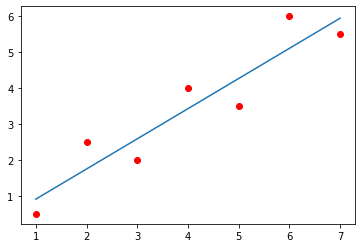

In [8]:
# Regresi Linear
import numpy as np
from sympy import *
init_printing(use_latex=True)

def regresi_linear(x,y,xi):
    assert (np.size(x)==np.size(y))
    # mendefinisikan matriks xn
    n = np.size(x)
    xn =np.empty((2,n),dtype=float)
    for i in range(n):
        xn[0,i]=1
        xn[1,i]=x[i]
    # menghitung nilai w
    w=np.linalg.solve(np.matmul(xn, np.transpose(xn)),np.matmul(xn,y))
    f_value = w[0]+w[1]*xi
    # menghitung nilai x tertentu berdasarkan regreai
    return f_value

# Implementasi pada contoh 17.1
x = np.array(([1,2,3,4,5,6,7]),dtype=float)
y = np.array(([0.5,2.5,2,4,3.5,6,5.5]),dtype=float)
#menampilkan persamaan regresi
xi=symbols("x")
print("persamaan regresi linear")
print('f(x) =')
pprint(regresi_linear(x,y,xi))
# nilai yang ingin dicari
xi =2 
fx=regresi_linear(x,y,xi)
print("f(x)=",fx)
#plotting
xp=np.linspace(x[0],x[len(x)-1],50)
yp=regresi_linear(x,y,xp)
plt.plot(x,y,'or')
plt.plot(xp,yp)
plt.show()

parameter slope dan intercept sama dari perhitungan regresi soal 6 dan soal 7. kecuali pada angka terakhir intercept paling akhir hanya berbeda sangat sedikit sehingga dapat diabaikan

## Soal 8

In [9]:
# Regresi Polinomial
import numpy as np
from sympy import *
init_printing(use_latex=True)

def regresi_polinomial(x,y,m,xi):
    assert (np.size(x)==np.size(y))
    # mendefinisikan matriks xn
    n = np.size(x)
    A=np.empty((m+1,m+1),dtype=float)
    B=np.empty(m+1,dtype=float)
    #looping untuk menghitung elemen A,B
    #matriks A[i,j] merupakan penjumlahan x^(i+j)kecuali pada A[0,0]
    #matriks B[i,j] merupakan penjumlahan y.x^i
    for i in range(m+1):
        for j in range (m+1):
            sumxx=0
            sumxy=0
            for k in range (len(x)): # looping untuk menghitung penjumlahan
                sumxx=sumxx+x[k]**(i+j)
                sumxy=sumxy+x[k]**i*y[k]
            A[i,j]=sumxx
        B[i]=sumxy
    a = np.linalg.solve(A,B)
    #looping untuk menghitung nilai f(x)
    fx=0
    for j in range (len(a)):
        fx=fx+a[j]*xi**j
    return fx

#Implementasi subroutin regresi polinomial
x= np.array(([0,1,2,3,4,5]),dtype=float)
y = np.array(([2.1,7.7,13.6,27.2,40.9,61.1]), dtype=float)
xx=symbols("x")
fx = regresi_polinomial(x,y,2,xx)
print("persamaan regresi polinomial")
pprint(fx)



persamaan regresi polinomial
                  2                                        
1.86071428571429⋅x  + 2.35928571428571⋅x + 2.47857142857143


## Soal 9

In [10]:
#Multiple linear regression

import numpy as np
from sympy import *
init_printing(use_latex=True)

def multiple_linear(xx): #Fungsi regresi multiple linear
    n=x.shape[0]+1
    # define matrix
    A=np.zeros((n,n),dtype=float)
    B=np.zeros(n,dtype=float)
    a=np.zeros(n,dtype=float)
    for i in range (n):
        for j in range (n):
            sumxy=0
            sumxx =0
            for g in range(x.shape[1]): #looping untuk menghitung jumlah perkalian
                # matrik A[i,j] merupakan perkalian xi dan xj
                # kecuali A[0,0]
                if i ==0:
                    a=1
                else:
                    a=x[i-1,g]
                if j==0:
                    b=1
                else:
                    b=x[j-1,g]
                sumxx = sumxx+a*b
                sumxy= sumxy+a*y[g]
            A[i,j]=sumxx
            B[i]=sumxy
    A[0,0]=x.shape[1]
    xx=np.append([1],xx)
    a= np.linalg.solve(A,B)
    print("a = ",a)
    yx=np.dot(a,xx)
    return yx
    
#implementasi multiple linear regression
x = np.array(([0,2,2.5,1,4,7],[0,1,2,3,6,2]),dtype=float) 
y = np.array(([5,10,9,0,3,27]),dtype=float)
xx=np.array(([1,2]),dtype=float)
yx=multiple_linear(xx)
print("x1,x2 =", xx)
print("f(x)=",yx)

a =  [ 5.  4. -3.]
x1,x2 = [1. 2.]
f(x)= 3.0000000000000027


## Soal 10

In [11]:
def error_newton(x,y,xn):# fungsi untuk interpolasi newton
    assert (x.shape == y.shape)
    n = np.size(x)
    # define matriks
    f = np.zeros((n,n),dtype=float)
    b = np.zeros(n,dtype=float)
    f[:,0] = y
    for kl in range(1,n): # looping untuk menghitung f[xn+1,xn, ... x0]
        for br in range(kl,n):
            f[br,kl]=(f[br,kl-1]-f[br-1,kl-1])/(x[br]-x[br-kl])#F[baris,kolom]
    fn = f[n-1,n-1]
    xtot =1
    for j in range (n-1):
        xtot =xtot*(xn-x[j])
    R=fn*xtot
    return R
x = np.array(([1.6,2,2.5,3.2,4,4.5]),dtype=float)
y = np.array(([2,8,14,15,8,2]),dtype=float)
xx = 2.8
#orde 1
# ambil nilai x,y sesuai orde
x = np.array(([1.6,4]),dtype=float)
y = np.array(([2,8]),dtype=float)
n = len(x)-1 #orde interpolasi newton
fx = interpolasi_newton(x,y,2.8) #fungsi nomor 1
error = error_newton(x,y,2.8) 
print("orde ke-",n)
print("f(",xx,") =", fx)
print("error =", error)
#orde 2
# ambil nilai x,y sesuai orde
x = np.array(([1.6,2.5,4.5]),dtype=float)
y = np.array(([2,14,2]),dtype=float)
n = len(x)-1 #orde interpolasi newton
fx = interpolasi_newton(x,y,2.8) #fungsi nomor 1
error = error_newton(x,y,2.8) 
print("orde ke-",n)
print("f(",xx,") =", fx)
print("error =", error)
#orde 3
# ambil nilai x,y sesuai orde
x = np.array(([1.6,2.5,4,4.5]),dtype=float)
y = np.array(([2,14,8,2]),dtype=float)
n = len(x)-1 #orde interpolasi newton
fx = interpolasi_newton(x,y,2.8) #fungsi nomor 1
error = error_newton(x,y,2.8) 
print("orde ke-",n)
print("f(",xx,") =", fx)
print("error =", error)




orde ke- 1
f( 2.8 ) = 4.999999999999999
error = 2.999999999999999
orde ke- 2
f( 2.8 ) = 15.599999999999998
error = -2.3999999999999986
orde ke- 3
f( 2.8 ) = 14.919999999999998
error = -0.4799999999999998


## Soal 11

persamaan interpolasi
-0.167⋅x + 0.00812⋅(x - 6.0)⋅(x - 5.0)⋅(x - 4.0)⋅(x - 3.0)⋅(x - 2.0) + 0.00144
583333333333⋅(x - 5.0)⋅(x - 4.0)⋅(x - 3.0)⋅(x - 2.0) - 0.00849999999999999⋅(x 
- 4.0)⋅(x - 3.0)⋅(x - 2.0) + 0.042⋅(x - 3.0)⋅(x - 2.0) + 0.834
xr yang nilai f(xr) nya 0.23
xr = 1.25
nilai interpolasi newton dari xr = 0.20857329101562472


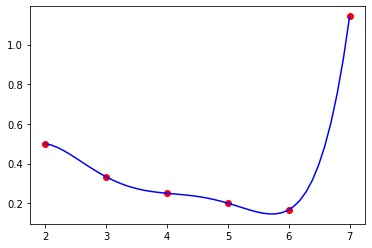

In [12]:
def bisection (xu,xl,f) :
    # looping pada metode bisection
    for N in range (50):
        xr = (xl + xu)/2
        if interpolasi_newton(x,y,xl)*interpolasi_newton(x,y,xr) < 0:
            xu = xr
        else:
            xl = xr
        if abs(interpolasi_newton(x,y,xr))<f:
            break
    return xr

# Initial guess
x = np.array(([2,3,4,5,6,7]),dtype=float)
y = np.array(([0.5,0.333,0.25,0.2,0.1667,1.1429]),dtype=float)
#plotting
xp = np.linspace(x[0],x[len(x)-1],50)
yp = interpolasi_newton(x,y,xp)
plt.plot(x,y,'or') #plotting nilai awal
plt.plot(xp,yp,'b-',label="orde 2") #plotting hasil interpolasi
# menampilkan persamaan interpolasi
print("persamaan interpolasi")
xx=symbols("x")
fx =interpolasi_newton(x,y,xx)
pprint(fx)
xl = 2
xu = -1
f = 0.23
xr=bisection(xu,xl,f)
print("xr yang nilai f(xr) nya",f)
print("xr =",xr)
print("nilai interpolasi newton dari xr =",interpolasi_newton(x,y,xr))

## Soal 12

nilai f(x) orde 4 13308.161803713529
nilai f(x) orde 5 4812.874999999858
nilai f(x) orde 6 -3547419.6171651087
nilai f(x) orde 8 5480463.919704535
nilai f(x) orde 8 874055170.246339
nilai f(x) orde 9 2302179158.4424314
nilai f(x) orde 10 -229030671904.8822


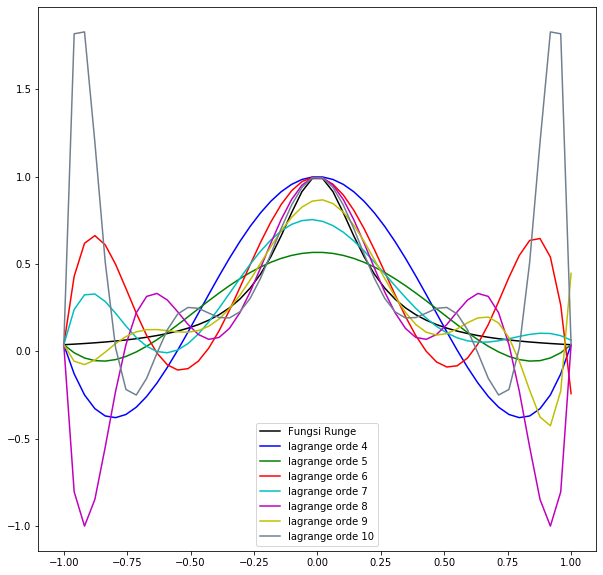

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def f(x) : # Fungsi runge
    return 1/(1+25*x**2)
# plotting fungsi runge
xp = np.linspace(-1,1,50)
yp = f(xp)
plt.figure(figsize=(10,10))
plt.plot(xp,yp,"k-",label = "Fungsi Runge")
def xorde (n): # untuk mencari x seragam pada orde n
    x=np.empty((n+1),dtype=float)
    a=float("{:.2f}".format(2/n))
    for i in range (n+1):
        x[i]=-1+a*i
    return x
xx=8 # fungsi yang ingin dicari nilainya
#Lagrange orde 4-10
yp4 = Lagrange(xorde(4),f(xorde(4)),xp)
fx4 = Lagrange(xorde(4),f(xorde(4)),xx)
print("nilai f(x) orde 4", fx4)
yp5 = Lagrange(xorde(5),f(xorde(5)),xp)
fx5 = Lagrange(xorde(5),f(xorde(5)),xx)
print("nilai f(x) orde 5", fx5)
yp6 = Lagrange(xorde(6),f(xorde(6)),xp)
fx6 = Lagrange(xorde(6),f(xorde(6)),xx)
print("nilai f(x) orde 6", fx6)
yp7 = Lagrange(xorde(7),f(xorde(7)),xp)
fx7 = Lagrange(xorde(7),f(xorde(7)),xx)
print("nilai f(x) orde 8", fx7)
yp8 = Lagrange(xorde(8),f(xorde(8)),xp)
fx8 = Lagrange(xorde(8),f(xorde(8)),xx)
print("nilai f(x) orde 8", fx8)
yp9 = Lagrange(xorde(9),f(xorde(9)),xp)
fx9 = Lagrange(xorde(9),f(xorde(9)),xx)
print("nilai f(x) orde 9", fx9)
yp10 = Lagrange(xorde(10),f(xorde(10)),xp)
fx10 = Lagrange(xorde(10),f(xorde(10)),xx)
print("nilai f(x) orde 10", fx10)
#Plotting lagrange orde 4-10
plt.plot(xp,yp4,"b-", label = "lagrange orde 4" )
plt.plot(xp,yp5,"g-", label = "lagrange orde 5" )
plt.plot(xp,yp6,"r-", label = "lagrange orde 6" )
plt.plot(xp,yp7,"c-", label = "lagrange orde 7" )
plt.plot(xp,yp8,"m-", label = "lagrange orde 8" )
plt.plot(xp,yp9,"y-", label = "lagrange orde 9" )
plt.plot(xp,yp10,"slategray", label = "lagrange orde 10" )
plt.legend()
plt.show()


## Soal 13

[ 4.01233959 14.0126183  44.01290656 94.01320481 44.01351351 14.01383317
  4.01416431 -0.10313959 -2.1389829  -3.282065   -3.98438476]
persamaan interval ke- 1
                  3                                        
6969.27876026755⋅x  + 30.3099995087248⋅x + 4.01233958538993
persamaan interval ke- 2
                                               3                             3
300.002881129483⋅x + 6969.27876026755⋅(0.2 - x)  + 6969.27890732002⋅(x - 0.1) 

                   
 - 22.9569485766859
persamaan interval ke- 3
                                               3                             3
900.002980943765⋅x + 6969.27890732002⋅(0.3 - x)  - 33030.7209370377⋅(x - 0.2) 

                   
 - 142.956968539542
persamaan interval ke- 4
                                                3                             
-899.996914578773⋅x - 33030.7209370377⋅(0.4 - x)  + 6969.27922780361⋅(x - 0.3)

3                   
  + 397.043000117219
persamaan interval ke- 5
                     

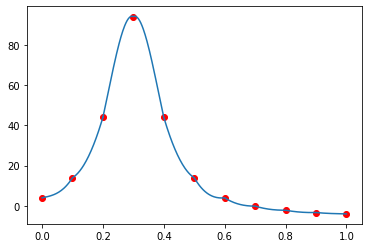

array([6969.27876026755*x**3 + 30.3099995087248*x + 4.01233958538993,
       300.002881129483*x + 6969.27876026755*(0.2 - x)**3 + 6969.27890732002*(x - 0.1)**3 - 22.9569485766859,
       900.002980943765*x + 6969.27890732002*(0.3 - x)**3 - 33030.7209370377*(x - 0.2)**3 - 142.956968539542,
       -899.996914578773*x - 33030.7209370377*(0.4 - x)**3 + 6969.27922780361*(x - 0.3)**3 + 397.043000117219,
       -299.996805162675*x + 6969.27922780362*(0.5 - x)**3 + 6969.27940250394*(x - 0.4)**3 + 157.04295635078,
       -52.9378669833154*x + 6969.27940250394*(0.6 - x)**3 + 2263.39723483816*(x - 0.5)**3 + 33.5134872611001,
       -28.5033576426081*x + 2263.39723483816*(0.7 - x)**3 + 996.429105674179*(x - 0.6)**3 + 18.8527816566757,
       -16.3961017975965*x + 996.429105674178*(0.8 - x)**3 + 600.195977089624*(x - 0.7)**3 + 10.3777025651676,
       -9.92415827351406*x + 600.195977089624*(0.9 - x)**3 + 449.529695423743*(x - 0.8)**3 + 5.20014774590163,
       -1.89015953439144*x + 449.529695423743

In [14]:
def f(x):
    f=1/((x-0.3)**2+0.01)+1/((x-9)**2+0.04)-6
    return f
x = np.array(([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]),dtype=float)
y= f(x)
print(y)
#plotting dengan menggunakan interpolasi spline No.3
spline_kubik(x,y) 

## Soal 14

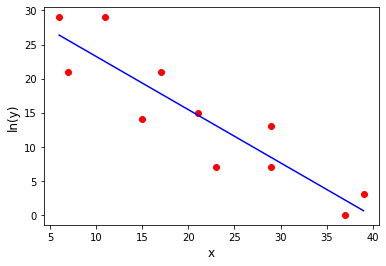

determinasi = 0.812682324745709
korelasi =  0.9014889487651576


In [26]:
x1 = np.array(([6,7,11,15,17,21,23,29,29,37,39]),dtype=float)
x2 = np.array(([29,21,29,14,21,15,7,7,13,0,3]),dtype=float)
xp= np.linspace(x1[0],x1[len(x1)-1],50)
yp = regresi_linear(x1,x2,xp) #fungsi soal 7
#plotting regresi
plt.plot(x1,x2,"or")
plt.plot(xp,yp,"b-")
plt.xlabel("x",fontsize=12)
plt.ylabel("ln(y)",fontsize=12)
plt.show()
#menghitung korelasi dan determinasi
St=0
Sr=0
for i in range(len(x1)):
    St = St+(x2[i]-sum(x2)/len(x2))**2
    fx = regresi_linear(x1,x2,x1) #hasil regresi linear dengan fungsi soal 7
    Sr = Sr+(x2[i]-fx[i])**2
determinasi = (St-Sr)/St
korelasi = np.sqrt(determinasi)
print("determinasi =",determinasi)
print("korelasi = ", korelasi)
    

## Soal 15 

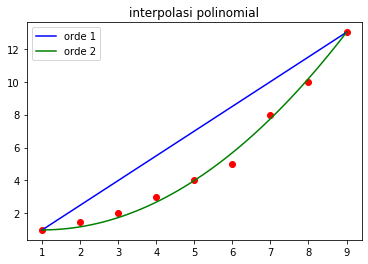

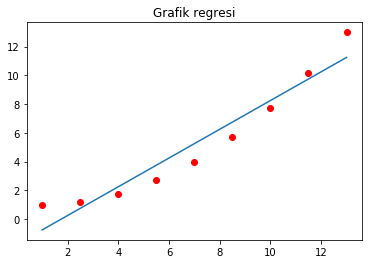

persamaan regresi linear
f(x) =
1.0⋅x - 1.75


In [16]:
x=np.array(([1,2,3,4,5,6,7,8,9]),dtype=float)
y=np.array(([1,1.5,2,3,4,5,8,10,13]),dtype=float)
#Polinomial orde 1
#mengambil 2 elemen untuk mencari interpolasi
x1=np.array(([1,9]),dtype=float)
y1=np.array(([1,13]),dtype=float)
yp1=interpolasi_newton(x1,y1,x)#dari fungsi soal 1

#Polinomial orde-2
#mengambil 3 elemen untuk mencari interpolasi
x2=np.array(([1,5,9]),dtype=float)
y2=np.array(([1,4,13]),dtype=float)
yp2=interpolasi_newton(x2,y2,x)#dari fungsi soal 1

#plotting polinomial
xp = np.linspace(x[0],x[len(x)-1],50)
ypp1 = interpolasi_newton(x1,y1,xp) #polinomial orde 1
ypp2 = interpolasi_newton(x2,y2,xp) #polinomial orde 2
plt.title("interpolasi polinomial")
plt.plot(x,y,'or')  #plotting nilai awal
plt.plot(xp,ypp1,'b-',label="orde 1")#plotting hasil interpolasi
plt.plot(xp,ypp2,'g-',label="orde 2")#plotting hasil interpolasi
plt.legend()
plt.show()

#Regresi linear untuk mencocokan polinomial orde 1 dan orde 2
xr=np.linspace(yp1[0],yp1[len(yp1)-1],50)
yr=regresi_linear(yp1,yp2,xr) #dari nomor 7
plt.title("Grafik regresi")
plt.plot(yp1,yp2,'or')
plt.plot(xr,yr,label="regresi")
plt.show()
#menampilkan persamaan regresi
xi=symbols("x")
print("persamaan regresi linear")
print('f(x) =')
pprint(regresi_linear(xr,yr,xi))



## Soal 16
y=ax^b diubah ke dalam bentuk ln(y) = ln(a) + bln(x)


nilai f( 9 )= 6.451452952701598


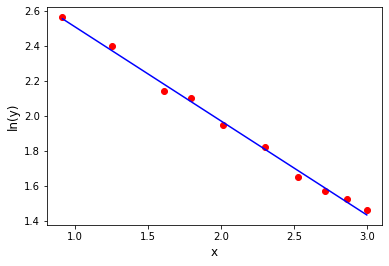

In [27]:
import numpy as np 
#Data x dan y awal sebelum ditransformasikan
xa = np.array(([2.5,3.5,5,6,7.5,10,12.5,15,17.5,20]),dtype=float)
ya = np.array(([13,11,8.5,8.2,7,6.2,5.2,4.8,4.6,4.3]), dtype=float)
x= np.empty(len(xa),dtype=float)
y= np.empty(len(xa),dtype=float)
#looping untuk mentransformasikan x,y
for i in range (len(xa)):
    x[i] = np.log(xa[i])
    y[i] = np.log(ya[i])
#menghitung nilai y menggunakan regresi
#nilai x perlu ditransformasikan terlebih dahulu
xxa=9
xx=np.log(xxa)
#hasil regresi ditransformasikan balik
yy=regresi_linear(x,y,xx)
yya = np.exp(yy)
print("nilai f(",xxa,")=",yya)
#plotting bentuk linear
xp=np.linspace(x[0],x[len(x)-1],50)
yp = regresi_linear(x,y,xp) #fungsi soal 7
plt.plot(x,y,"or")
plt.plot(xp,yp,"b-")
plt.xlabel("x",fontsize=12)
plt.ylabel("ln(y)",fontsize=12)
plt.show()


## Soal 17
transformasi untuk mengubah ke dalam bentuk linear dilakukan dengan mengubah persamaan
Y=ae^Bx
menjadi 
ln Y = ln(a)+Bx


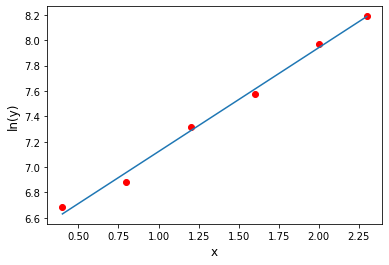

In [18]:
import numpy as np 
#Data x dan y awal sebelum ditransformasikan
xa = np.array(([0.4,0.8,1.2,1.6,2,2.3]),dtype=float)
ya = np.array(([800,975,1500,1950,2900,3600]), dtype=float)
x= np.empty(len(xa),dtype=float)
y= np.empty(len(xa),dtype=float)
#looping untuk mentransformasikan x,y
for i in range (len(xa)):
    x[i] = xa[i]
    y[i] = np.log(ya[i])
#plotting bentuk linear
xp=np.linspace(x[0],x[len(x)-1],50)
yp = regresi_linear(x,y,xp) #fungsi soal 7
plt.plot(x,y,"or")
plt.plot(xp,yp)
plt.xlabel("x",fontsize=12)
plt.ylabel("ln(y)",fontsize=12)
plt.show()


## Soal 18

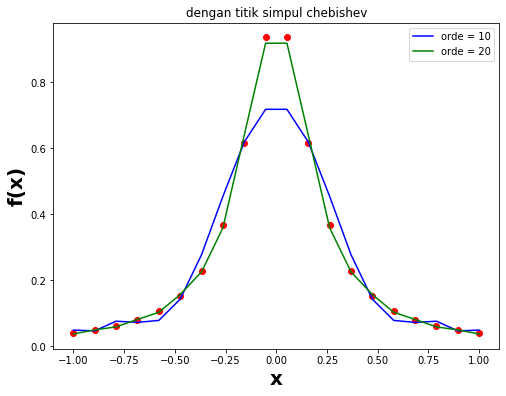

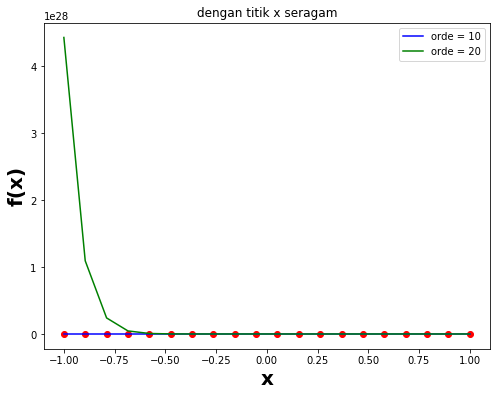

In [19]:
import numpy as np

def f(x):
    return 1/(1+25*x**2)

def chebyshev(n,xp):
    # nilai x max dan min, serta orde
    a = np.min(x)
    b = np.max(x)

    # buat z, x, y
    z = np.empty(n)
    xz = np.empty(n)
    yz = np.empty(n)
    Tp = np.zeros(n)

    for i in range (n):
        z[i]=np.cos((2*(i+1)-1)*np.pi/(2*n))
        xz[i]=(z[i]*(b-a)+(a+b))/2
        yz[i]=f(xz[i])
    # Matrik T(n,n)
    T = np.empty([n,n])

    for i in range(n):
        T[i,0]=1
        T[i,1]=z[i]
        for j in range(2,n):
            T[i,j] = 2*z[i]*T[i,j-1]-T[i,j-2]
    # mencari c
    c = np.zeros(n)
    yT = np.zeros(n)

    # jumlahkan yT
    # hitung c = sum yT/ sum T^2
    for j in range(n):
        for i in range (n):
            yT[j]= yT[j]+yz[i]*T[i,j]

    for i in range(n):
        if i == 0:
            c[i]= yT[i]/n
        else :
            c[i]= 2*yT[i]/n
    zp = (2*xp-a-b)/(b-a)
    Tp[0] =1
    Tp[1]=zp
    yp=c[0]*Tp[0]+c[1]*Tp[1]
    for j in range (2,n):
        Tp[j]=2*zp*Tp[j-1]-Tp[j-2]
        yp=yp+c[j]*Tp[j]
    return yp

def xseragam(x,n,xp):
   # nilai x max dan min, serta orde
    a = np.min(x)
    b = np.max(x)

    # buat z, x, y
    z = np.empty(n)
    xz = np.empty(n)
    yz = np.empty(n)
    Tp = np.zeros(n)
    a = 2/n
    for i in range (n):
        xz[i]=-1+a*i
        z[i]= (2*xz[i]-a-b)/(b-a)
        yz[i]=f(xz[i])
    # Matrik T(n,n)
    T = np.empty([n,n])

    for i in range(n):
        T[i,0]=1
        T[i,1]=z[i]
        for j in range(2,n):
            T[i,j] = 2*z[i]*T[i,j-1]-T[i,j-2]
    # mencari c
    c = np.zeros(n)
    yT = np.zeros(n)

    # jumlahkan yT
    # hitung c = sum yT/ sum T^2
    for j in range(n):
        for i in range (n):
            yT[j]= yT[j]+yz[i]*T[i,j]

    for i in range(n):
        if i == 0:
            c[i]= yT[i]/n
        else :
            c[i]= 2*yT[i]/n
    zp = (2*xp-a-b)/(b-a)
    Tp[0] =1
    Tp[1]=zp
    yp=c[0]*Tp[0]+c[1]*Tp[1]
    for j in range (2,n):
        Tp[j]=2*zp*Tp[j-1]-Tp[j-2]
        yp=yp+c[j]*Tp[j]
    return yp

x = np.linspace(-1,1,20)
y = f(x)
## Dengan menggunakan titik simpul chebyshev
# plotting 
yp1 = np.zeros(len(x))
yp2 = np.zeros(len(x))
ypx1= np.zeros(len(x))
ypx2= np.zeros(len(x))
for i in range (len(x)):
    yp1[i]=chebyshev(10,x[i])# orde 10
    yp2[i]=chebyshev(20,x[i])# orde 20
    ypx1[i]=xseragam(x,10,x[i])# orde 10
    ypx2[i]=xseragam(x,20,x[i])# orde 20
#plot
fig,ax = plt.subplots(1,figsize=(8,6))
plt.title("dengan titik simpul chebishev")
plt.plot(x,y,'or')
plt.plot(x,yp1,'b-',label="orde = %d"%(10))
plt.plot(x,yp2,'g-',label="orde = %d"%(20))
ax.set_xlabel('x', fontsize=20, fontweight='bold')
ax.set_ylabel('f(x)', fontsize=20, fontweight='bold')
plt.legend()
plt.show()
fig,ax = plt.subplots(1,figsize=(8,6))
plt.title("dengan titik x seragam")
plt.plot(x,y,'or')
plt.plot(x,ypx1,'b-',label="orde = %d"%(10))
plt.plot(x,ypx2,'g-',label="orde = %d"%(20))
ax.set_xlabel('x', fontsize=20, fontweight='bold')
ax.set_ylabel('f(x)', fontsize=20, fontweight='bold')
plt.legend()
plt.show()




Penggunaan titik sampul chebyshev menghasilkan fungsi yang jauh lebih mendekati fungsi runge daripada menggunakan titik x seragam